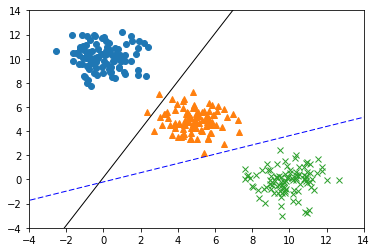

In [18]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(0)

M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

'''
データの生成
'''
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

# matplotlibで描画
%matplotlib inline
import matplotlib.pyplot as plt

x1_x, x1_y, x2_x, x2_y, x3_x, x3_y = [], [], [], [], [], []

for i in range(n):
  x1_x.append(X1[i][0])
  x1_y.append(X1[i][1])
  x2_x.append(X2[i][0])
  x2_y.append(X2[i][1])
  x3_x.append(X3[i][0])
  x3_y.append(X3[i][1])


plt.plot(x1_x, x1_y,"o")
plt.plot(x2_x, x2_y,"^")
plt.plot(x3_x, x3_y,"x")


plt.plot([-3, 13], [-5.8, 26.01], color='k', linestyle='-', linewidth=1)
plt.plot([-10, 20], [-4.03, 7.45], color='b', linestyle='--', linewidth=1)

plt.xlim([-4,14])
plt.ylim([-4,14])

'''
plt.plot(0, 8, marker="*", markersize=20, markerfacecolor="r")
plt.plot(6, 6, marker="*", markersize=20, markerfacecolor="r")
plt.plot(10, 8, marker="*", markersize=20, markerfacecolor="r")
plt.plot(10, -2, marker="*", markersize=20, markerfacecolor="r")
'''
'''
モデル設定
'''
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),
                              reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))
